**AWAl**

---


Tahapan apa yang akan dilakukan
*   Import of Required Modules and importing (Reading) Data
*   Exploratory Data Analysis (EDA)
*   Handling missing data
*   Feature selection
*   Categorical data encoding
*   Data visualization
*   Building regression model


---




**Import**

In [1]:
# data analysis libraries 
import numpy as np
import pandas as pd
import math
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# menghilangkan display max columns
pd.set_option("display.max_columns", None)
# transform
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
## ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing data
df = pd.read_csv('/content/train.csv')
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

**Exploratory Data Analysis (EDA)**

In [3]:
# backup data
df_backup=df.copy()

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
df_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [9]:
# menghapus kolom Id yang tidak terpakai
df=df.drop(columns=['Id'], axis=1)

---


**Handling Missing Data and Feature Selection**

---

**Handling missing data categorial data**

In [10]:
# memisahkan numeric dengan categorial data
df_num = df.select_dtypes(exclude='object')
df_o = df.select_dtypes(include='object')
## Memperlihatkan berapa nilai yang null
obj_nan = pd.DataFrame({'count': df_o.isnull().sum(), 'rate': df_o.isnull().sum()*100/len(df_o)})
obj_null=obj_nan.sort_values(by=['rate'],ascending=False)
obj_null


,count,rate
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
GarageType,81,5.547945
GarageCond,81,5.547945
GarageQual,81,5.547945
GarageFinish,81,5.547945
BsmtFinType2,38,2.602740


In [11]:
df_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

In [12]:
# fill None in object columns where NaN values
for col in list(df_o.columns):
  df_o[col].fillna('None',inplace=True)
df_o.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


In [13]:
df_o.isna().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

**Feature Selection Categorial Data**

Saat ini tahap menunjukkan distribusi categorial data terhadap SalePrice menggunakan boxplot.

1. Jika, setiap nilai categorial data terdistribusi terhadap SalePrice dalam kolom hampir sama atau tidak berubah secara signifikan

=> Artinya kolom itu sendiri tidak mempengaruhi nilai SalePrice
2. Jika categorial data memiliki data yang None

=> Data yang None tidak diketahui kategori apa, sehingga akan menjadi simpang siur diolah

=> Maka saya akan menghapus kolom tersebut

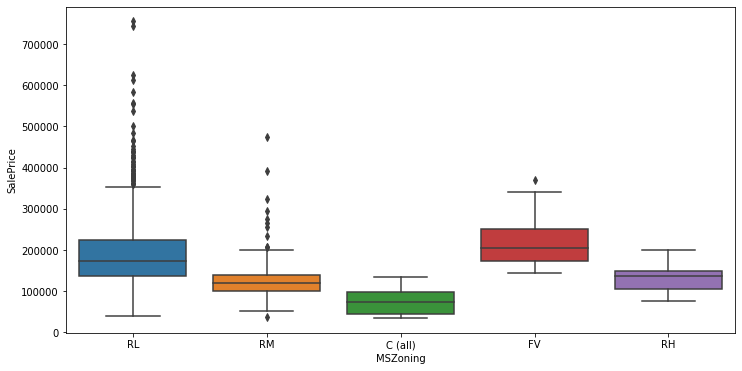

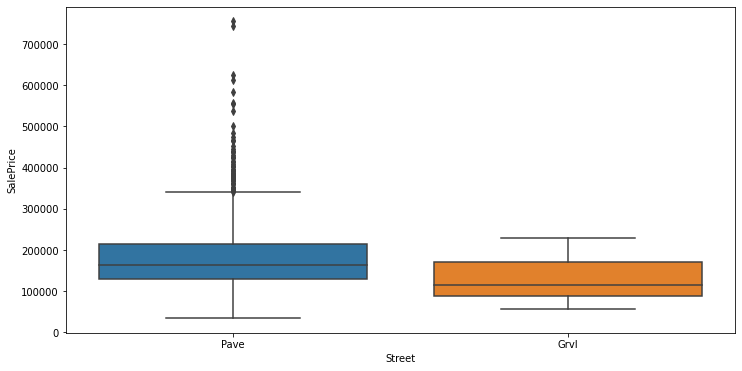

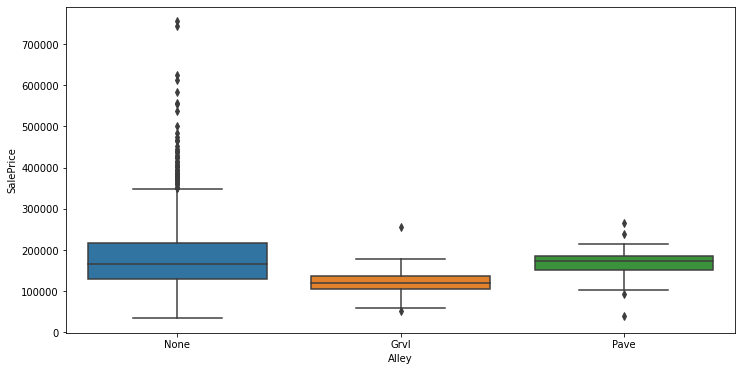

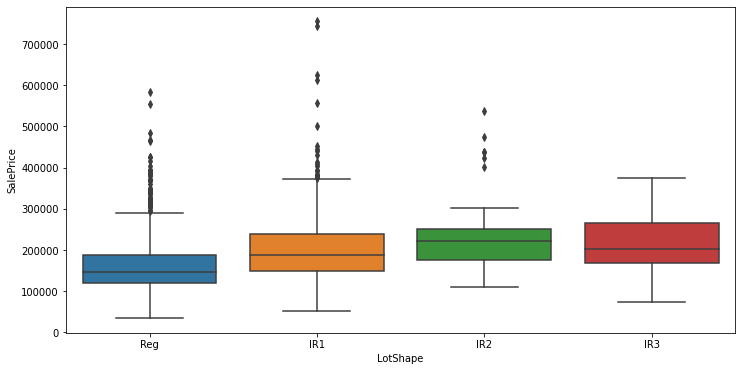

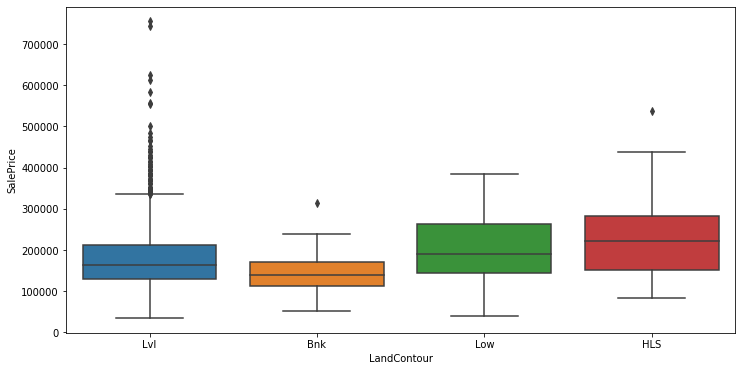

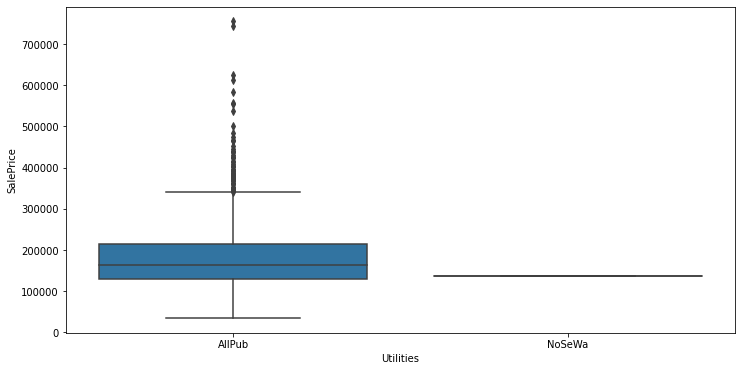

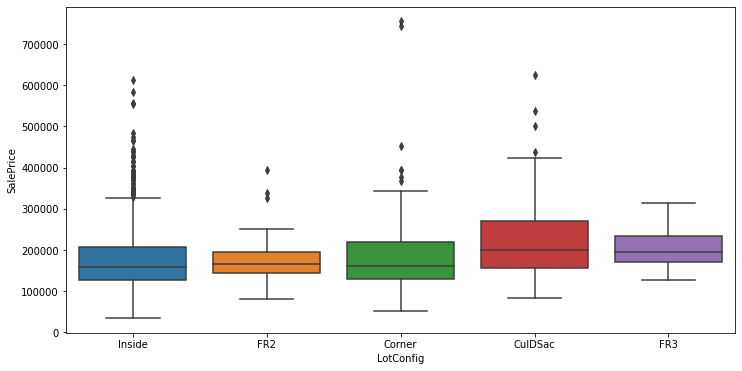

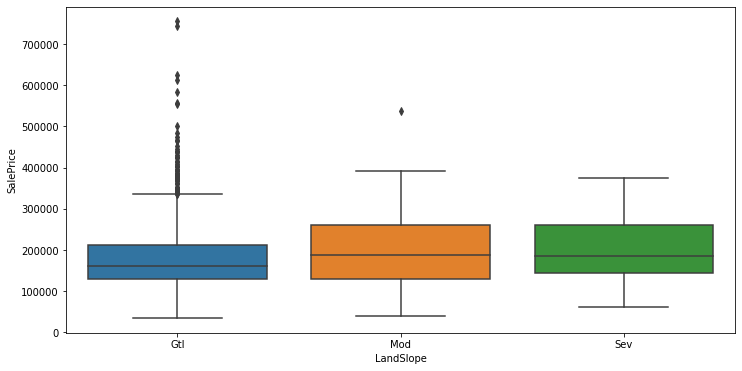

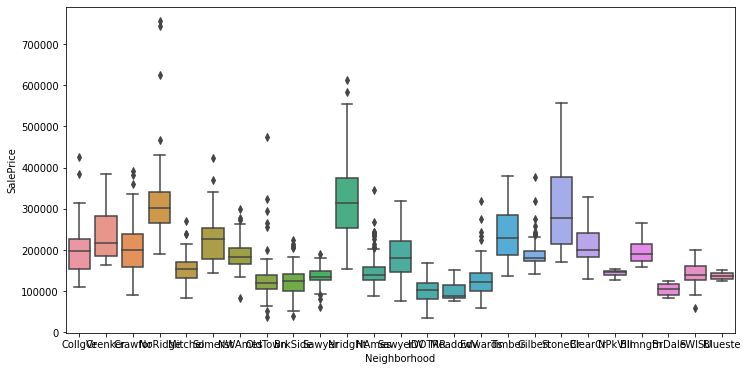

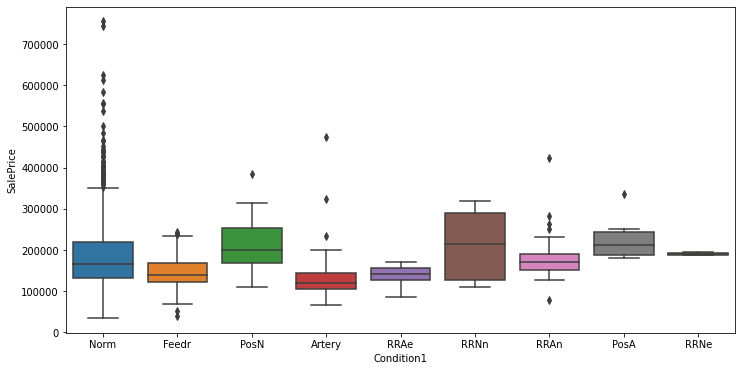

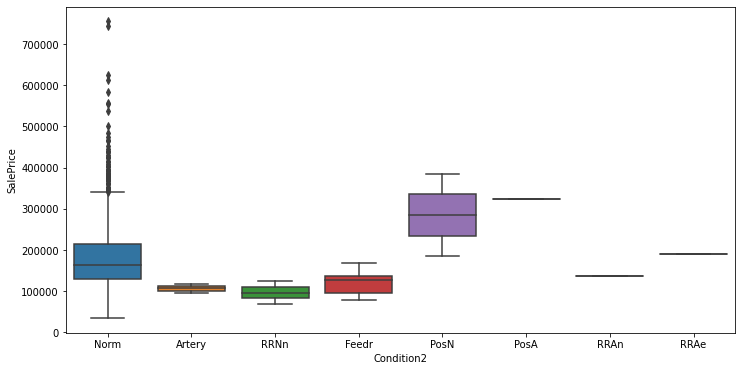

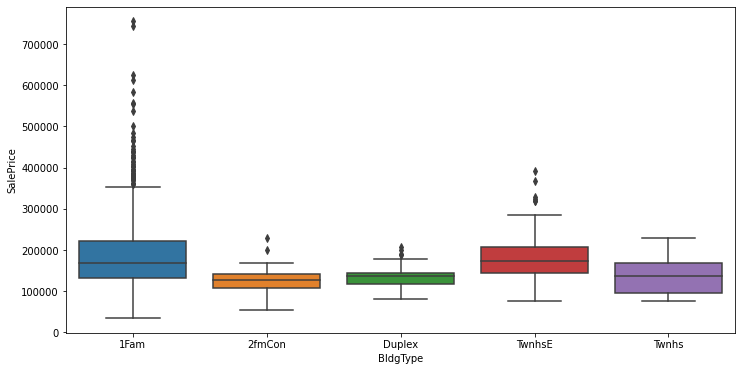

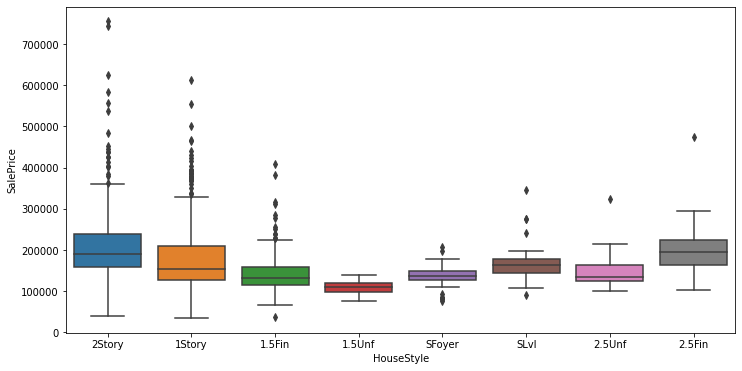

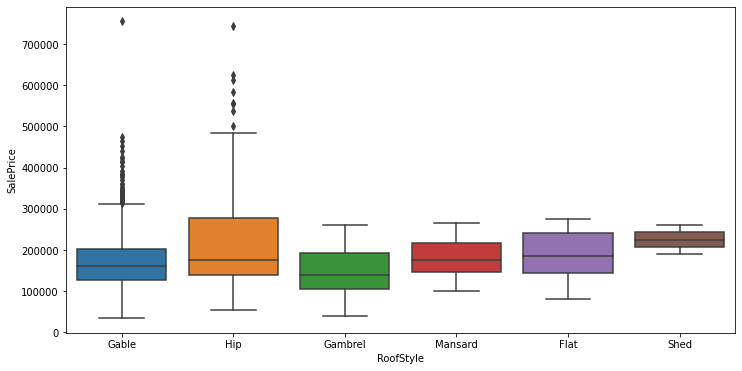

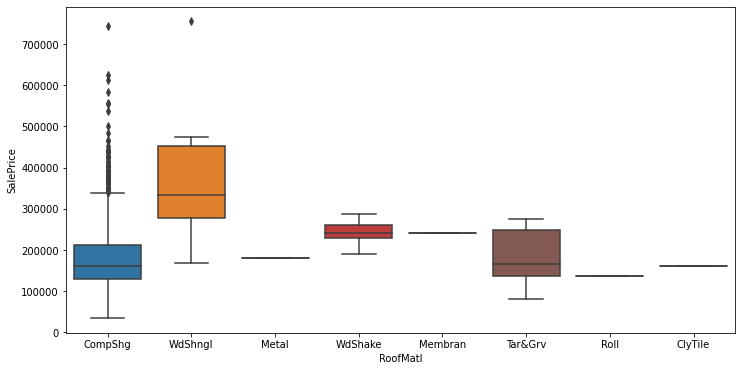

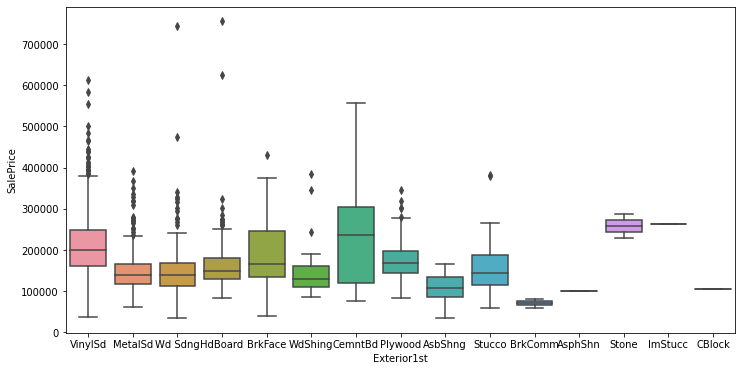

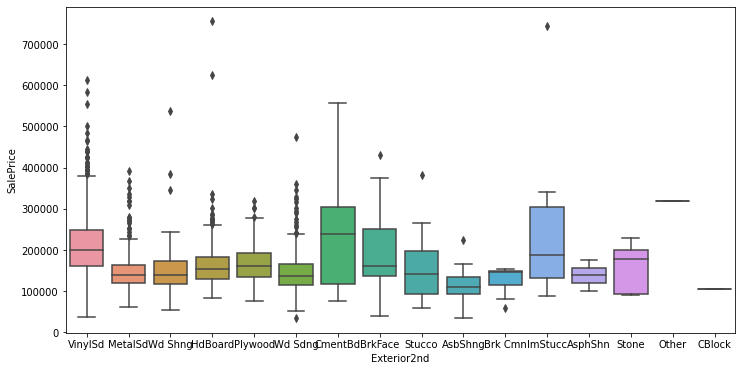

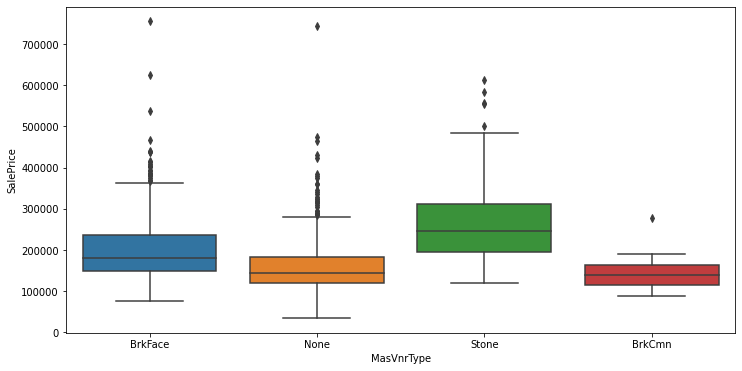

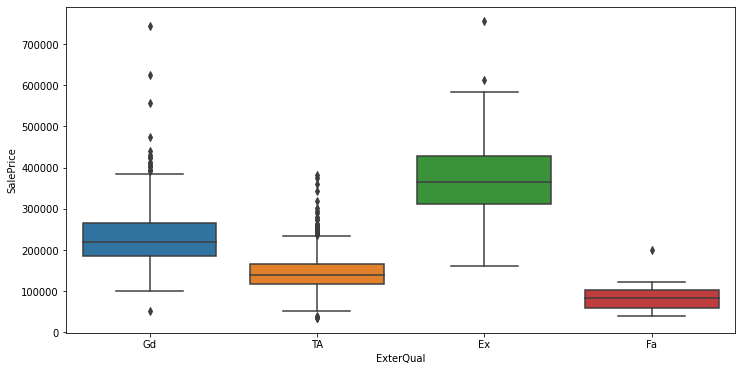

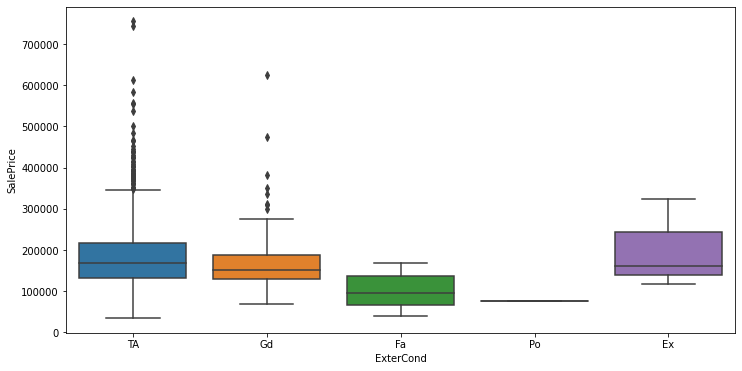

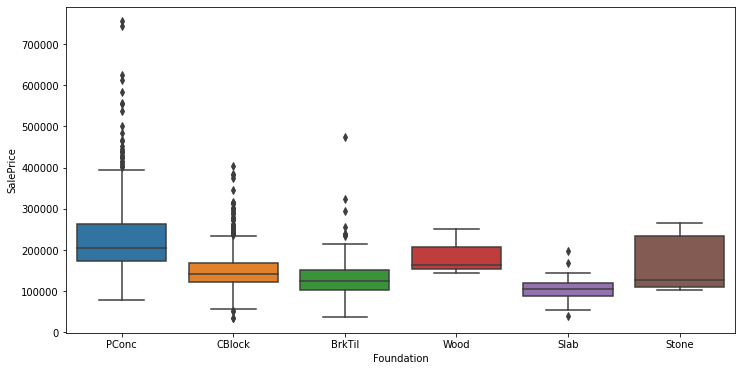

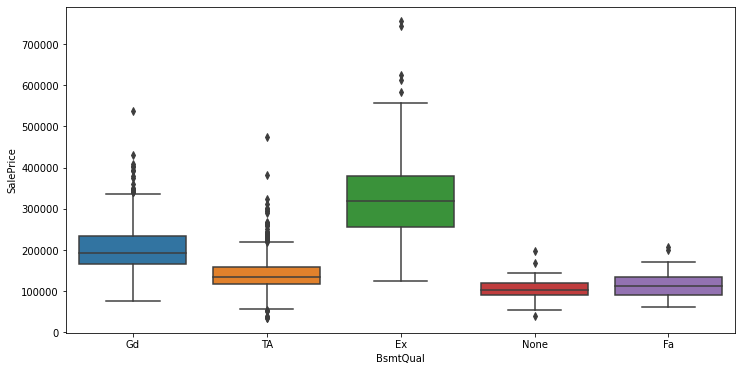

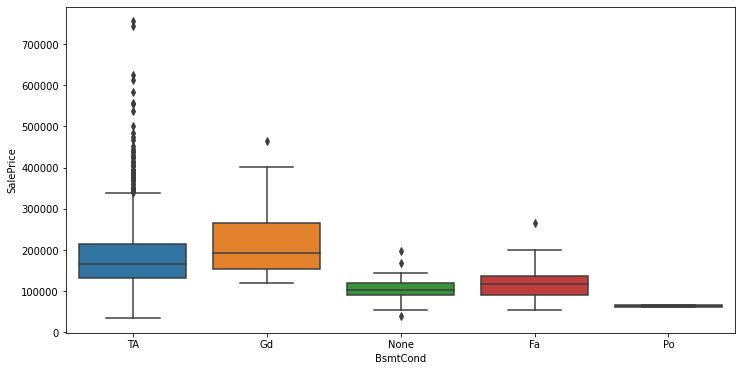

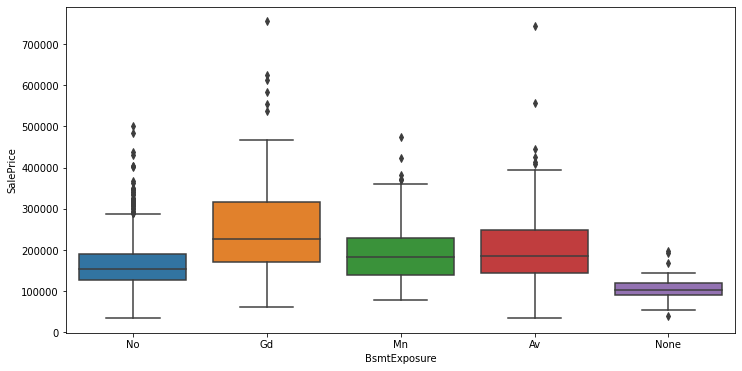

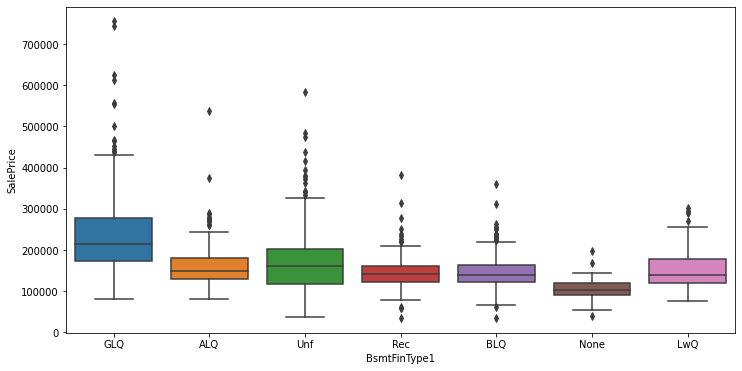

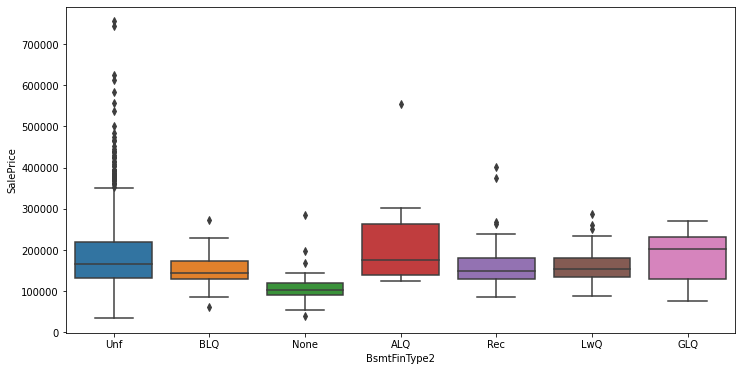

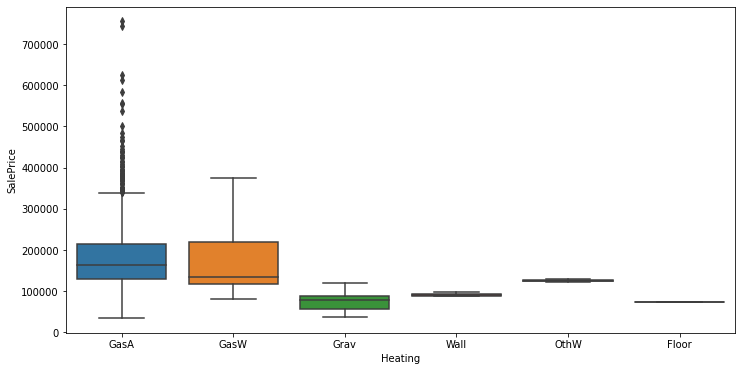

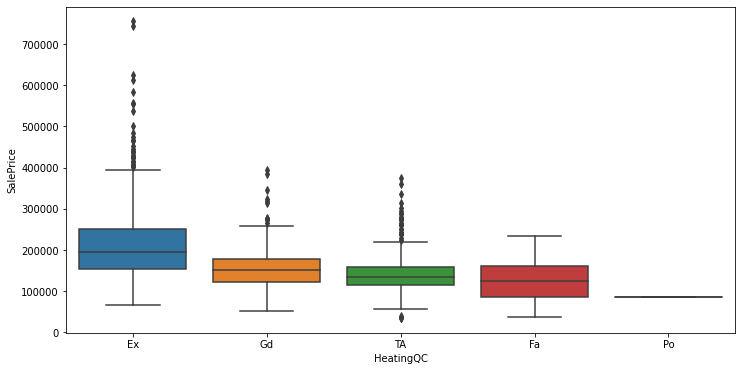

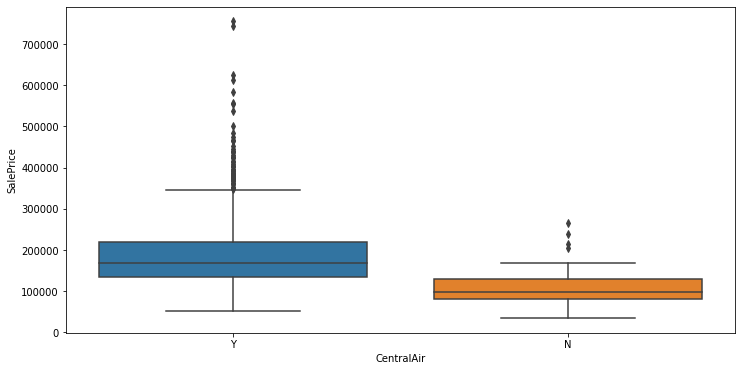

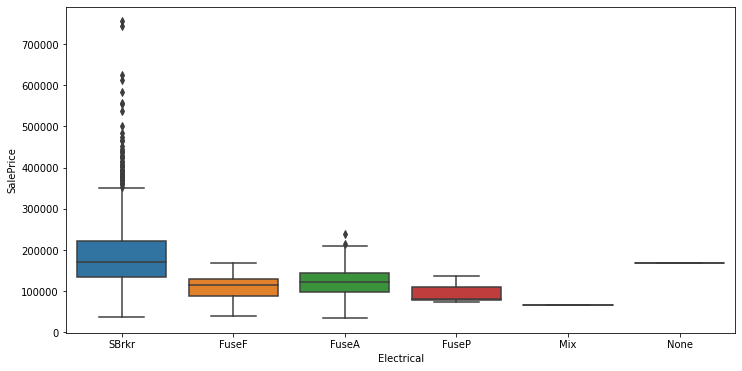

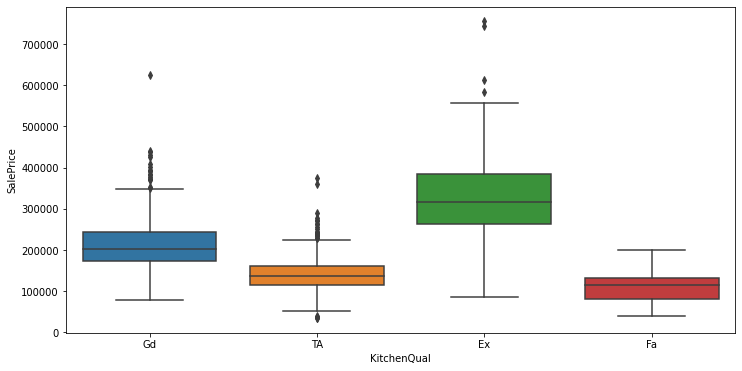

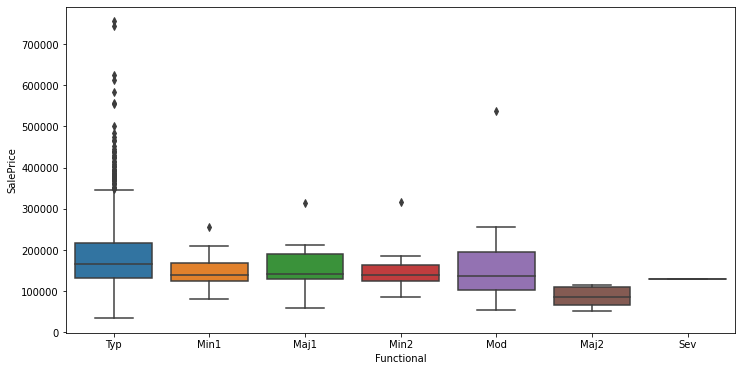

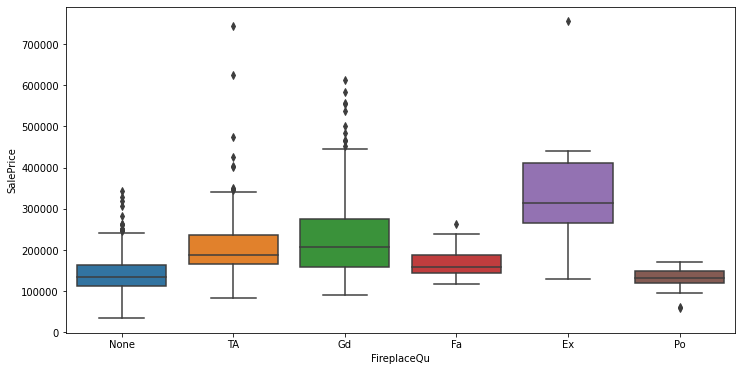

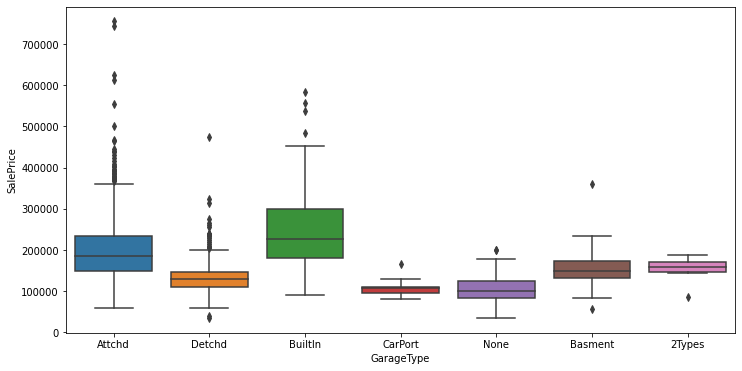

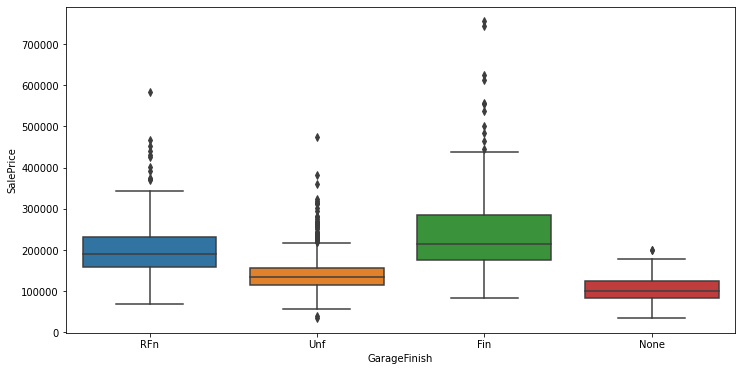

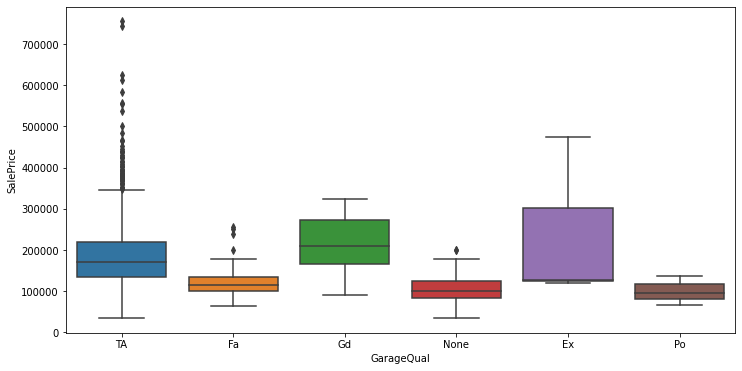

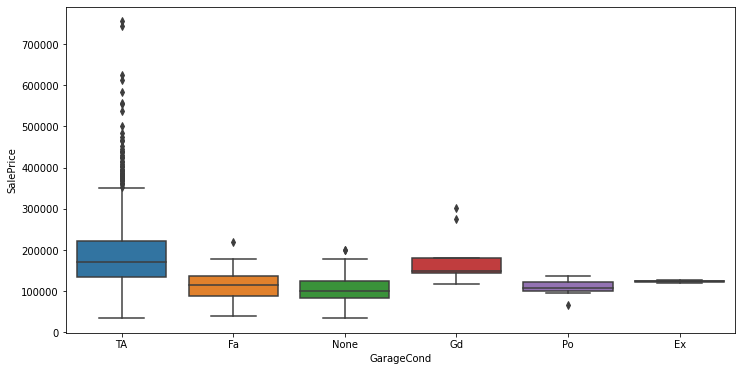

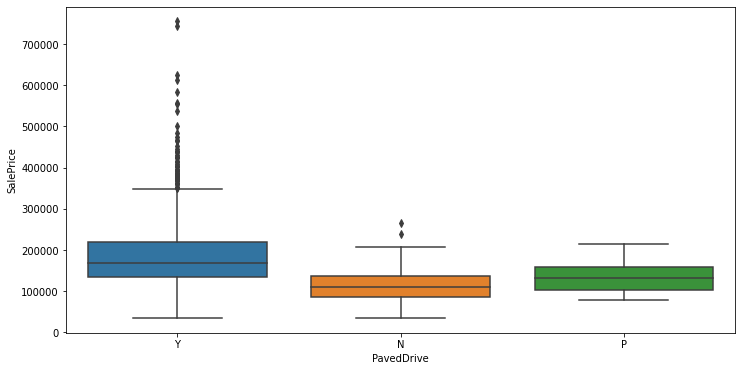

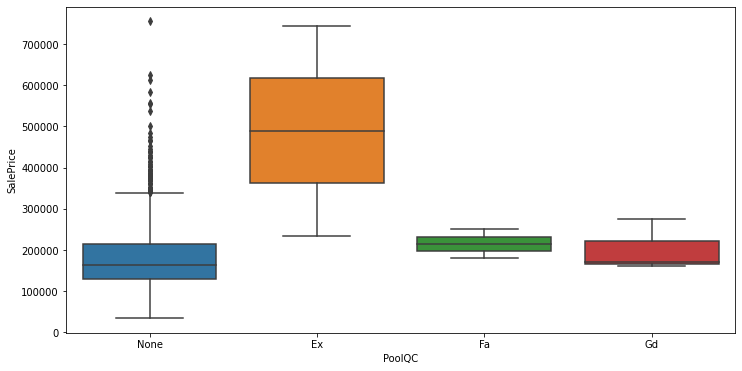

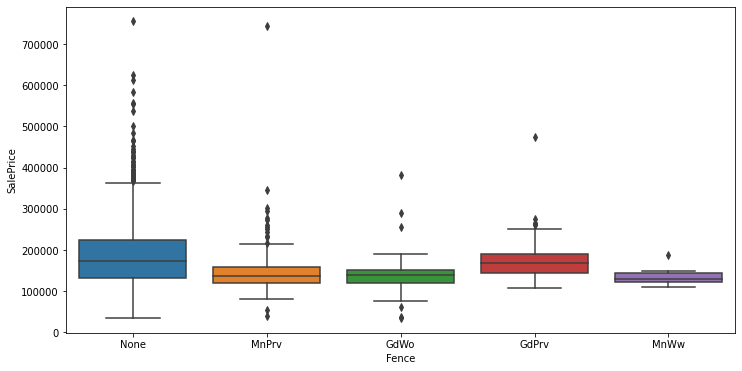

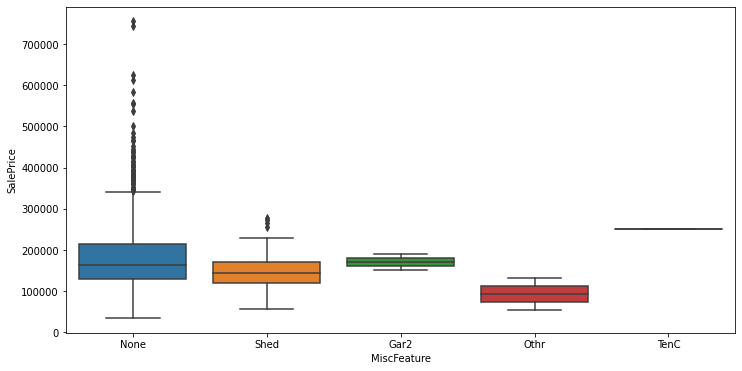

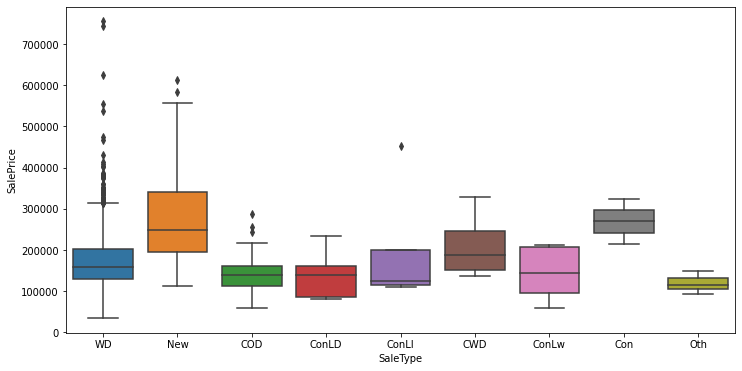

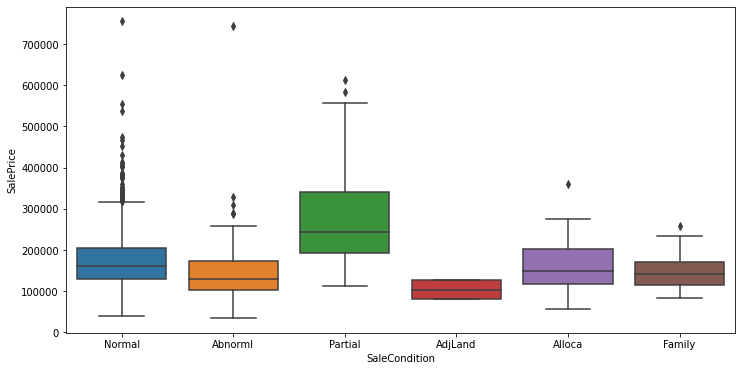

In [14]:
# menunjukkan pengaruh dari categorial data terhadap SalePrice menggunakan boxplot
for i in df_o.columns:
  plt.subplots(1, figsize=(12, 6))
  sns.boxplot(x=i, y=df["SalePrice"],data=df_o)
plt.show()

Dari distribusi yang telah terlihat beberapa kolom tidak sesuai dari yang akan kita gunakan.




In [15]:
# data yang tidak akan dipakai
drop_col=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']

In [16]:
df_o.drop(columns=drop_col, inplace=True)

In [17]:
# categorial data yang akan dipakai
df_o.columns

Index(['Neighborhood', 'ExterQual', 'KitchenQual'], dtype='object')

In [18]:
df_o=df_o.replace(['EX','Gd','TA','Fa','Po'],['5','4','3','2','1'])

In [19]:
# transform
list_col=list(df_o.columns)
df_o[list_col]=df_o[list_col].apply(le.fit_transform)
df_o.head()

,Neighborhood,ExterQual,KitchenQual
0,5,2,2
1,24,1,1
2,5,2,2
3,6,1,2
4,15,2,2


Keterangan:

Pada kolom KitchenQual (kualitas dapur) dan ExterQual (kualitas bahan pada eksterior)

0=Fair

1=Typical/Average

2=Good

3=Excelent

In [20]:
df_o_sale=df_o
df_o_sale['SalePrice']=df_num['SalePrice']
df_obj_corr=df_o_sale.corr()['SalePrice'].reset_index().sort_values(by='SalePrice',ascending=False)
df_obj_corr

,index,SalePrice
3,SalePrice,1.000000
1,ExterQual,0.682639
2,KitchenQual,0.659600
0,Neighborhood,0.210851


  Dari korelasi yang dilakukan di atas dapat disimpulkan bahwa ExterQual dan KitchenQual memiliki pengaruh positif signifikan terhadap SalePrice lebih 0.6 dibandingkan Neighborhood yang memiliki pengaruh positif tapi tidak signifikan dengan nilai 0.21

  Hal ini dapat diinterpretasi bahwa memiliki kualitas dapur yang baik akan menaikkan harga rumah, karena dapur adalah pusat untuk berkumpulnya keluarga dan teman. Selain itu dapur yang bagus akan memiliki ruang ventilasi atau memberikan sirkulasi udara yang baik, sehingga rumah tidak akan terpenuhi asap yang membuat penghuni rumah sakit, semakin baik dapur maka kebersihan dari dapur akan lebih mudah sehingga mengurangi resiko penyakit diakibatkan dapur.

  Selain kualitas dapur, ternyata material yang baik akan mempengaruhi harga rumah, hal ini dikarenakan semakin bagus kualitas material maka ketahanan rumah memiliki resiko yang kecil, selain itu material yang bagus bisa membuat rumah menjadi lebih menarik.

In [21]:
# menghapus vaiable yang tidak signifikan
df_o.drop(columns='Neighborhood', inplace=True)
df_o.columns

Index(['ExterQual', 'KitchenQual', 'SalePrice'], dtype='object')

**Feature Selection Num Data**

Tahap ini memilih data number yang akan digunakan dengan menggunakan correlation lebih dari 0.5 menunjukkan bahwa data tersebut memiliki pengaruh terhadap SalePrice.

Jika, setiap nilai data yang terdistribusi terhadap SalePrice dalam kolom kurang dari 0.5 maka kolom tersebut tidak memiliki pengaruh yang signifikan terhadap SalePrice

=> Artinya kolom itu sendiri tidak mempengaruhi nilai SalePrice

=> Jadi, saya akan menghapus kolom tersebut

In [22]:
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [23]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [24]:
df_num.isna().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [25]:
df_num_corr=df_num.corr()['SalePrice'].reset_index().sort_values(by='SalePrice',ascending=False)
df_num_corr

,index,SalePrice
36,SalePrice,1.000000
3,OverallQual,0.790982
15,GrLivArea,0.708624
25,GarageCars,0.640409
26,GarageArea,0.623431
11,TotalBsmtSF,0.613581
12,1stFlrSF,0.605852
18,FullBath,0.560664
22,TotRmsAbvGrd,0.533723
5,YearBuilt,0.522897


In [26]:
# menunjukkan kolom yang mempengaruhi SalePrice
strong_corr=df_num.corr()['SalePrice'].abs()
strong_num = strong_corr[strong_corr > 0.5]
strong_num.reset_index()

,index,SalePrice
0,OverallQual,0.790982
1,YearBuilt,0.522897
2,YearRemodAdd,0.507101
3,TotalBsmtSF,0.613581
4,1stFlrSF,0.605852
5,GrLivArea,0.708624
6,FullBath,0.560664
7,TotRmsAbvGrd,0.533723
8,GarageCars,0.640409
9,GarageArea,0.623431


In [27]:
df_strong_num=list(strong_num.index)
df_strong_num

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

**Handling Missing Data**

In [28]:
# fillna with mean
for cols in list(df_num):
  df_num[cols] = df_num[cols].fillna(df_num[cols].mean())

In [29]:
df_num.isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [30]:
for i in df_strong_num:
  print('Missing data', i, df_num[i].isna().sum())

Missing data OverallQual 0
Missing data YearBuilt 0
Missing data YearRemodAdd 0
Missing data TotalBsmtSF 0
Missing data 1stFlrSF 0
Missing data GrLivArea 0
Missing data FullBath 0
Missing data TotRmsAbvGrd 0
Missing data GarageCars 0
Missing data GarageArea 0
Missing data SalePrice 0


In [31]:
df1=df_o

In [32]:
# melakukan merger
for i in df_strong_num:
  df1[i]=df_num[i]
df1.head()

,ExterQual,KitchenQual,SalePrice,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,2,2,208500,7,2003,2003,856,856,1710,2,8,2,548
1,1,1,181500,6,1976,1976,1262,1262,1262,2,6,2,460
2,2,2,223500,7,2001,2002,920,920,1786,2,6,2,608
3,1,2,140000,7,1915,1970,756,961,1717,1,7,3,642
4,2,2,250000,8,2000,2000,1145,1145,2198,2,9,3,836


In [33]:
# melakukan correlation pada data yang telah merger
df1.corr()['SalePrice'].abs()

ExterQual       0.682639
KitchenQual     0.659600
SalePrice       1.000000
OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
Name: SalePrice, dtype: float64

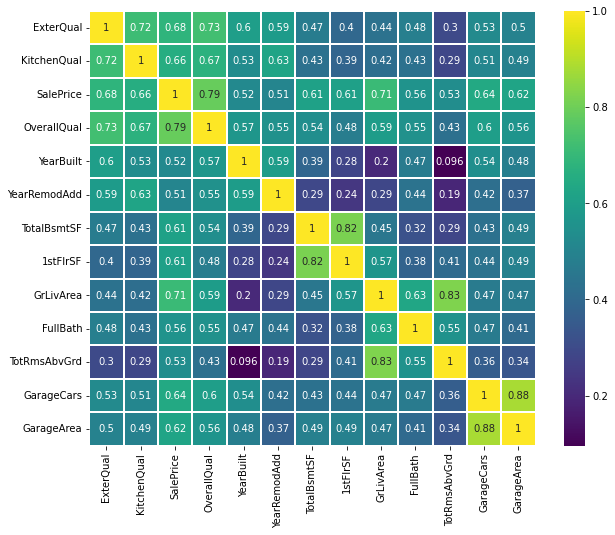

In [34]:
# membuat heatmap untuk mengetahui hubungan masing-masing variable
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),linewidths=1,cmap="viridis",annot=True)

**Interpretasi**

Dari data yang di atas kita bisa menarik kesimpulan masing-masing variable yang memiliki pengaruh signifikan sebesar lebih dari 0.75

1) SalePrice (harga jual) ~ OverallQual (Rates the overall material and finish of the house) = 0.79

Rata-rata kualitas material maka semakin mahal karena material yang baik akan memberikan tahan daya rumah semakin tinggi dan memberikan keindahan untuk rumah.

2) TotalBsmtSF (Total square feet of basement area) ~ 1stFlrSF (First Floor square feet) = 0.82

Ini bisa masuk logika jika area basement semakin besar maka lantai 1 akan mengikuti.

3) GrLivArea (Above grade (ground) living area square feet) ~ TotRmsAbvGrd (Total rooms above grade (does not include bathrooms)) = 0.83

4) GarageCars ~ GarageArea = 0.88

Jika, area garasi mobil menambah lahan lain maka kapasitas mobil yang dimuat garasi juga akan membesar seiring menambahnya area garasi baru.

5) SalePrice ~ YearBuilt = 0.52

Hal menarik pada bagian tahun pembangunan  memiliki pengaruh terhadap harga walaupun hanya 0.52, ini bisa terjadi karena semakin baru rumah yang dibuat biasanya masih terlihat bersih dan daya tahan dari pembangunan masih ada dibandingkan rumah lama yang mungkin membutuhkan perawatan tambahan.



---

**Building Model**

---



In [35]:
df1.head()

,ExterQual,KitchenQual,SalePrice,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,2,2,208500,7,2003,2003,856,856,1710,2,8,2,548
1,1,1,181500,6,1976,1976,1262,1262,1262,2,6,2,460
2,2,2,223500,7,2001,2002,920,920,1786,2,6,2,608
3,1,2,140000,7,1915,1970,756,961,1717,1,7,3,642
4,2,2,250000,8,2000,2000,1145,1145,2198,2,9,3,836


In [36]:
# membuat dataframe untuk data test dengan menggunakan vaiable yang dipilih untuk diolah
data_test=pd.DataFrame()
list(df_test.columns)
for i in df1.columns:
  if (i == df_test.columns).any():
    data_test[i]=df_test[i]


In [37]:
data_test.head()

,ExterQual,KitchenQual,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,TA,TA,5,1961,1961,882.0,896,896,1,5,1.0,730.0
1,TA,Gd,6,1958,1958,1329.0,1329,1329,1,6,1.0,312.0
2,TA,TA,5,1997,1998,928.0,928,1629,2,6,2.0,482.0
3,TA,Gd,6,1998,1998,926.0,926,1604,2,7,2.0,470.0
4,Gd,Gd,8,1992,1992,1280.0,1280,1280,2,5,2.0,506.0


In [38]:
data_test=data_test.replace(['EX','Gd','TA','Fa','Po'],['5','4','3','2','1'])

In [39]:
# transform data_test
test_o=data_test.select_dtypes(include='object')
test_col=list(test_o.columns)
data_test[test_col]=data_test[test_col].apply(le.fit_transform)
data_test.head()

,ExterQual,KitchenQual,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,1,1,5,1961,1961,882.0,896,896,1,5,1.0,730.0
1,1,2,6,1958,1958,1329.0,1329,1329,1,6,1.0,312.0
2,1,1,5,1997,1998,928.0,928,1629,2,6,2.0,482.0
3,1,2,6,1998,1998,926.0,926,1604,2,7,2.0,470.0
4,2,2,8,1992,1992,1280.0,1280,1280,2,5,2.0,506.0


In [40]:
list_data=data_test.columns
for i in list_data:
  print('Missing data', i, data_test[i].isna().sum())

Missing data ExterQual 0
Missing data KitchenQual 0
Missing data OverallQual 0
Missing data YearBuilt 0
Missing data YearRemodAdd 0
Missing data TotalBsmtSF 1
Missing data 1stFlrSF 0
Missing data GrLivArea 0
Missing data FullBath 0
Missing data TotRmsAbvGrd 0
Missing data GarageCars 1
Missing data GarageArea 1


In [41]:
# fillna data test
for col in list_data:
  data_test[col] = data_test[col].fillna(data_test[col].mean())

In [42]:
# Split Train Test
y = df1['SalePrice']
x = df1.drop(columns=['SalePrice'])
test=data_test

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [44]:
linreg.fit(x_train,y_train)

LinearRegression()

In [45]:
y_prediction=linreg.predict(x_test)

In [46]:
y_prediction

array([ 1.38522107e+05,  2.94647860e+05,  1.17222022e+05,  1.61735039e+05,
        2.94389989e+05,  5.92067287e+04,  2.25925776e+05,  1.58273649e+05,
        5.85288917e+04,  1.27400485e+05,  1.46662997e+05,  1.05946469e+05,
        8.72367980e+04,  2.29710191e+05,  1.79187933e+05,  1.29455774e+05,
        2.18795749e+05,  1.25814923e+05,  1.19282852e+05,  2.25358712e+05,
        1.75105882e+05,  2.29190448e+05,  1.90609652e+05,  1.10748805e+05,
        2.21155308e+05,  1.84673713e+05,  2.14492419e+05,  9.55160769e+04,
        1.74005841e+05,  2.15168195e+05,  1.21888903e+05,  2.53903166e+05,
        2.30947976e+05,  9.18637033e+04,  2.67825580e+05,  1.40689727e+05,
        1.60688904e+05,  2.29136554e+05,  2.97890617e+05,  9.08309130e+04,
        1.37815064e+05,  2.42375428e+05,  1.12661796e+05,  3.28492489e+05,
        1.25675803e+05,  1.49330796e+05,  1.07542866e+05,  1.13022840e+05,
        3.58176572e+05,  1.34837806e+05,  1.07552729e+05,  1.96682381e+05,
        1.17267905e+05,  

In [47]:
# score regress
score=r2_score(y_test,y_prediction)
print('r2 socre is :',score)
print('mean_sqrd_error is :',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is :',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is : 0.8116161251209351
mean_sqrd_error is : 1444965772.496352
root_mean_squared error of is : 38012.705408801834




---

**Upload File**

---



In [48]:
#Predict file

In [49]:
linreg.fit(x,y)
ypred=linreg.predict(test)

In [50]:
my_submission = pd.DataFrame({'Id': df_test.Id, 'SalePrice': ypred})
my_submission.to_csv('submission.csv', index=False)



---

**KESIMPULAN**

Dari analisa di atas saya menyimpulkan harga rumah dipengaruhi oleh 12 variable terdiri dari:

1. ExterQual: Evaluates the quality of the material on the exterior = 0.68

2. KitchenQual: Kitchen quality = 0.66

3. OverallQual: Rates the overall material and finish of the house = 0.79

4. YearBuilt: Original construction date = 0.52

5. YearRemodAdd: Remodel date (same as construction date if no remodeling or additions) = 0.51

6. TotalBsmtSF: Total square feet of basement area = 0.61

7. 1stFlrSF: First Floor square feet = 0.61

8. GrLivArea: Above grade (ground) living area square feet = 0.71

9. FullBath: Full bathrooms above grade = 0.56

10. TotRmsAbvGrd: Total rooms above grade (does not include bathrooms) = 0.53

11. GarageArea: Size of garage in square feet = 0.62

12. GarageCars: Size of garage in car capacity = 0.64


Dari pengaruh harga rumah yang terbesar dari rata-rata kualitas bahan material karena material yang baik akan memberikan tahan daya rumah semakin tinggi dan memberikan keindahan untuk rumah. Kualitas dapur karena dapur adalah pusat untuk berkumpulnya keluarga dan teman. Selain itu dapur yang bagus akan memiliki ruang ventilasi atau memberikan sirkulasi udara yang baik, sehingga rumah tidak akan terpenuhi asap yang membuat penghuni rumah sakit, semakin baik dapur maka kebersihan dari dapur akan lebih mudah sehingga mengurangi resiko penyakit diakibatkan dapur. Ruang tamu juga diperhatikan karena tempat di mana orang lain akan ditempatkan di ruangan tersebut, kapasitas mobil dalam garasi juga mempengaruhi harga rumah karena bagi yang memiliki banyak mobil ini akan lebih hemat dikarenakan bisa menampung banyak mobil di dalam garasi.

---

